In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [36]:
%%time
id = pd.read_csv('applications data.csv')

Wall time: 2.86 s


In [32]:
newone = pd.read_csv('applications data.csv')

In [33]:
newone.loc[newone['ssn'] == 999999999,:].head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,20160101,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,20160101,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,20160101,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,20160101,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,20160101,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0


In [3]:
id.shape

(1000000, 10)

In [4]:
id.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [5]:
id.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [8]:
rec = len(id)
rec

1000000

In [9]:
id.describe()

,record,date,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,2.016067e+07,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.016010e+07,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.016040e+07,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.016070e+07,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.016100e+07,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,2.016123e+07,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [10]:
id.isnull().sum()

record         0
date           0
ssn            0
firstname      0
lastname       0
address        0
zip5           0
dob            0
homephone      0
fraud_label    0
dtype: int64

In [11]:
id.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [6]:
id.set_index('record',inplace = True)

In [7]:
id.head()

,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
record,,,,,,,,,
1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [14]:
id['fraud_label'].value_counts()

0    985607
1     14393
Name: fraud_label, dtype: int64

In [15]:
len(id['date'].unique())

365

In [16]:
id['date'].value_counts()[:1]

20160816    2877
Name: date, dtype: int64

In [69]:
#id.loc[id['fraud_label'] == 0]

In [50]:
WithOF = id.loc[id['fraud_label']==0]['date'].value_counts()[:10]
WithOF

20160816    2830
20160417    2820
20160101    2819
20160304    2812
20160718    2809
20160307    2806
20160609    2803
20160313    2802
20160808    2797
20160903    2794
Name: date, dtype: int64

In [18]:
With1F = id.loc[id['fraud_label']==1]['date'].value_counts()[:10]
With1F

20160204    90
20160831    75
20160720    70
20160719    69
20160727    66
20160721    65
20161002    64
20160110    64
20160706    62
20160428    61
Name: date, dtype: int64

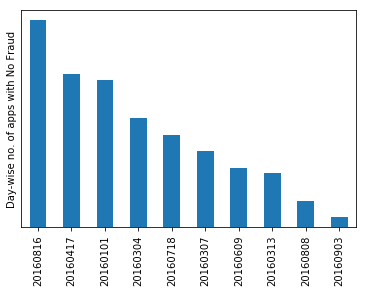

In [51]:
ar = WithOF.plot(kind = 'bar', x= 'date')
plt.ylabel('Day-wise no. of apps with No Fraud')
ar.set_yscale('log')
plt.savefig('date1WithOF.jpeg')

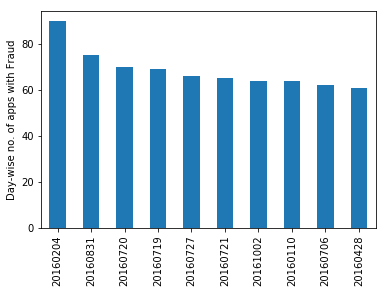

In [20]:
With1F.plot(kind = 'bar', x= 'date')
plt.ylabel('Day-wise no. of apps with Fraud')
plt.savefig('date1With1F.jpeg')

In [21]:
len(id['ssn'].unique())

835819

In [22]:
id['ssn'].value_counts()[:10]

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
165764866       34
189622157       30
295308935       30
588726212       29
163830210       29
Name: ssn, dtype: int64

In [34]:
id.loc[id['ssn'] == 11,:].head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,20160101,11,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0


In [19]:
#id.head()

In [16]:
id.loc[4,'record']

5

In [24]:
id.loc[69,'ssn']

583514574

In [20]:
range(len(id))

range(0, 1000000)

In [37]:
for  i in range(len(id)):
    if (id.loc[i,'ssn'] == 999999999):
        id.loc[i,'ssn'] = id.loc[i,'record']
id.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [38]:
for  i in range(len(id)):
    if (id.loc[i,'homephone'] == 9999999999):
        id.loc[i,'homephone'] = id.loc[i,'record']
id.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [39]:
id.loc[id['ssn'] == 999999999,:].head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label


In [40]:
id.loc[id['homephone'] == 9999999999,:].head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label


In [45]:
for  i in range(len(id)):
    if (id.loc[i,'address'] == '123 MAIN ST'):
        id.loc[i,'address'] = id.loc[i,'record']
id.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [ ]:
id.loc[id['address'] == '123 MAIN ST',:].head(5)

In [46]:
for  i in range(len(id)):
    if (id.loc[i,'dob'] == 19070626):
        id.loc[i,'dob'] = id.loc[i,'record']
id.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [48]:
id.to_csv('ApplicationsFrivLRemo.csv')

In [47]:
id.loc[id['dob'] == 19070626,:].head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label


In [23]:
WithOFssn = id.loc[id['fraud_label']==0]['ssn'].value_counts()[:10]
WithOFssn

999999999    16840
938972725      111
810776805       73
189622157       30
407447121       20
118692079       17
849295926       14
529601142       14
728224866       13
698993266       13
Name: ssn, dtype: int64

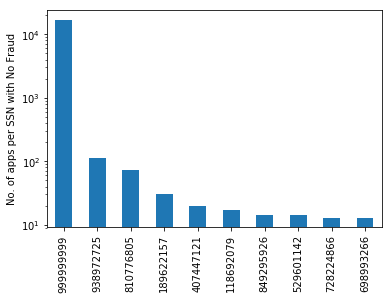

In [24]:
ax = WithOFssn.plot(kind = 'bar')
plt.ylabel('No. of apps per SSN with No Fraud')
ax.set_yscale('log')
plt.savefig('WithOFssn.jpeg')

In [25]:
With1Fssn = id.loc[id['fraud_label']==1]['ssn'].value_counts()[:10]
With1Fssn

999999999    95
829352390    69
473311863    35
165764866    34
295308935    27
826488428    25
687424410    24
588726212    24
457346566    23
258312431    23
Name: ssn, dtype: int64

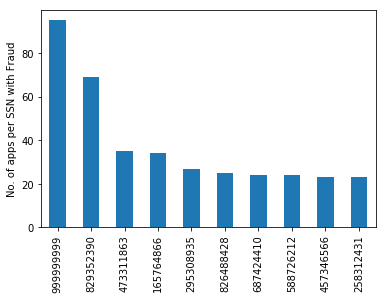

In [28]:
ay = With1Fssn.plot(kind = 'bar')
plt.ylabel('No. of apps per SSN with Fraud')
#ay.set_yscale('log')
plt.savefig('With1Fssn.jpeg')

In [47]:
len(id['address'].unique())

828774

In [42]:
id['dob'].value_counts()[:10]

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
20090127       280
19460901       135
19591208       126
19280611       120
19670215       102
Name: dob, dtype: int64

In [43]:
WithOFlN = id.loc[id['fraud_label']==0]['lastname'].value_counts()[:10]
WithOFlN

ERJSAXA     8465
UMXUUUSE    7020
UMARRMA     6715
MEAXJUX     5412
XMERRR      5368
SXZXJRJT    4279
EUSEZRAE    4083
USMATTUR    3998
ETERUXME    3712
RTZRTZAS    3524
Name: lastname, dtype: int64

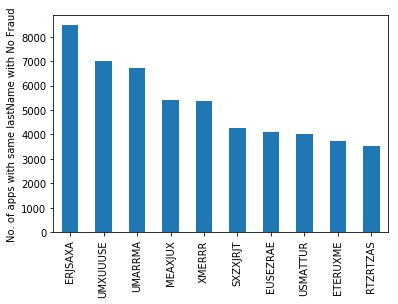

In [44]:
ax = WithOFlN.plot(kind = 'bar')
plt.ylabel('No. of apps with same lastName with No Fraud')
#ax.set_yscale('log')
plt.savefig('WithOFlN.jpeg')

In [45]:
With1FlN = id.loc[id['fraud_label']==1]['lastname'].value_counts()[:10]
With1FlN

UMXUUUSE    136
UMARRMA     117
ERJSAXA     115
EUSEZRAE     90
XMERRR       83
MEAXJUX      80
MSXRAZZ      71
RJURSTXJ     66
SXZXJRJT     61
SSRMURXM     57
Name: lastname, dtype: int64

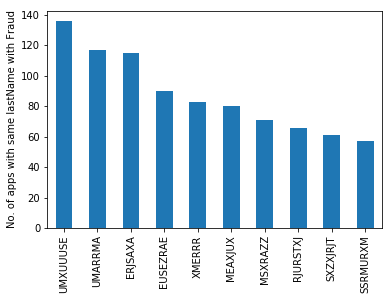

In [46]:
ay = With1FlN.plot(kind = 'bar')
plt.ylabel('No. of apps with same lastName with Fraud')
#ay.set_yscale('log')
plt.savefig('With1FlN.jpeg')